In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Machine learning model
from sklearn.metrics import accuracy_score  # For evaluating model performance


In [ ]:
# Load the dataset (you have uploaded the dataset already)
file_path = "/content/Titanic-Dataset.csv"
data = pd.read_csv(file_path)

# Show the first 5 rows of the dataset to understand its structure
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Exploration

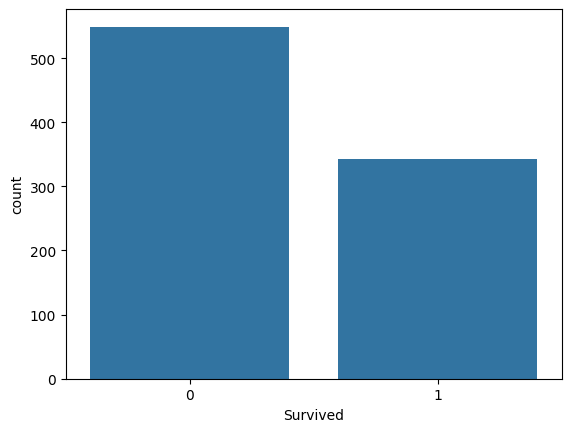

In [ ]:
# Check for missing values in each column
data.isnull().sum()

# Show basic statistics
data.describe()

# Visualize the number of survivors vs non-survivors
sns.countplot(x='Survived', data=data)
plt.show()


Handle Missing Data

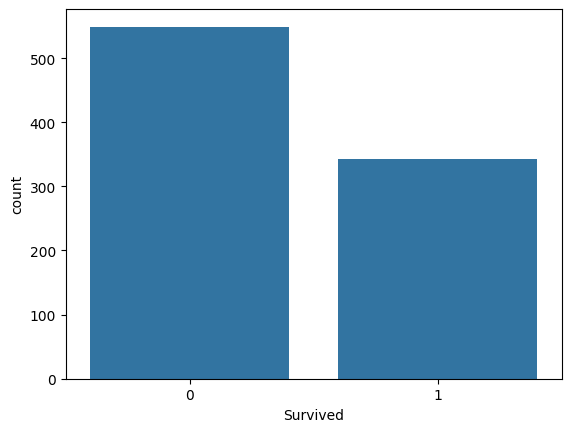

<ipython-input-12-7a25f487d1d8>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-12-7a25f487d1d8>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Load the dataset (you have uploaded the dataset already)
file_path = "/content/Titanic-Dataset.csv"
data = pd.read_csv(file_path)

# Show the first 5 rows of the dataset to understand its structure
data.head()

# Check for missing values in each column
data.isnull().sum()

# Show basic statistics
data.describe()

# Visualize the number of survivors vs non-survivors
sns.countplot(x='Survived', data=data)
plt.show()

# Fill missing values in 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common port
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
# Change 'cabin' to 'Cabin' to match the actual column name
data.drop('Cabin', axis=1, inplace=True)

# Check again for missing data
data.isnull().sum()


convert categorical data

In [ ]:
# Convert 'Sex' column to numerical values (0 for male, 1 for female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' column to numerical values (0 for S, 1 for C, 2 for Q)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


Split Data into Features and Labels

In [ ]:
# Features: Everything except 'Survived'
X = data.drop('Survived', axis=1)

# Labels: The 'Survived' column
y = data['Survived']


In [ ]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Assuming 'Ticket' is the column containing 'STON/O 2. 3101293'
# Remove this column from features used for training:
X = data.drop(['Survived', 'Name', 'Ticket'], axis=1)

#Continue with the rest of the code as before
y = data['Survived']
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier()

# Train the model using the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Calculate the accuracy of the model
# Get predictions from the model on test data
y_pred = model.predict(X_test)

# Now you can calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 71.51%
